About Dataset:
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Bank client data:

Age (numeric)

Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)

Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

Default: has credit in default? (categorical: 'no', 'yes', 'unknown')

Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

In [119]:
import numpy as np
import pandas as pd

In [120]:
df=pd.read_csv("/content/bank-additional-full.csv",sep= ";")

In [121]:
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [122]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [123]:
df1=df.copy()

In [124]:
df1.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [125]:
df1['age']

0        56
1        57
2        37
3        40
4        56
         ..
41183    73
41184    46
41185    56
41186    44
41187    74
Name: age, Length: 41188, dtype: int64

In [126]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [127]:
df1=df1.drop(columns=['month','day_of_week','duration'])

In [128]:
df1

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [132]:
def convert_y(x):
    if x == "no":
        x = 0
    if x == "yes":
      x=1
    return x

In [133]:
df1['y']=df['y'].apply(lambda x: convert_y(x))

In [134]:
df1['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [135]:
df1['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [136]:
def edu(x):
  if x=='unknown':
    x=0
  if x=='illiterate':
    x=1
  if x=='basic.6y':
    x=2
  if x=='basic.4y':
    x=3
  if x=='professional.course':  
    x=4
  if x=='basic.9y':
    x=5
  if x=='high.school':
    x=6
  if x=='university.degree':
    x=7
  return x    




In [137]:
df1['education']=df['education'].apply(lambda x: edu(x))

In [138]:
from sklearn.preprocessing import LabelEncoder
categoricals=['job','marital','default','housing','loan','contact','poutcome','campaign']
labelencoder = LabelEncoder()
for i in categoricals:
    df1[i] = labelencoder.fit_transform(df1[i]) 
df1.head()

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,3,0,0,0,1,0,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,6,1,0,0,1,0,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,6,0,2,0,1,0,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,2,0,0,0,1,0,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,6,0,0,2,1,0,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [139]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler
scaler=StandardScaler()

df1[['pdays','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m',	'nr.employed']]=scaler.fit_transform(df1[['pdays','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m',	'nr.employed']])

In [140]:
df1

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,3,0,0,0,1,0,0.195414,0,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680,0
1,57,7,1,6,1,0,0,1,0,0.195414,0,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680,0
2,37,7,1,6,0,2,0,1,0,0.195414,0,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680,0
3,40,0,1,2,0,0,0,1,0,0.195414,0,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680,0
4,56,7,1,6,0,0,2,1,0,0.195414,0,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,4,0,2,0,0,0,0.195414,0,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1
41184,46,1,1,4,0,0,0,0,0,0.195414,0,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0
41185,56,5,1,7,0,2,0,0,1,0.195414,0,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0
41186,44,9,1,4,0,0,0,0,0,0.195414,0,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1


Verifying Multicollinearity

In [141]:
df1[['pdays','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m',	'nr.employed']].corr()

,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
pdays,1.000000,-0.475619,0.271004,0.078889,-0.091342,0.296899,0.372605
poutcome,-0.475619,1.000000,0.192972,0.211330,0.178289,0.184144,0.119689
emp.var.rate,0.271004,0.192972,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.078889,0.211330,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,-0.091342,0.178289,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.296899,0.184144,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,0.372605,0.119689,0.906970,0.522034,0.100513,0.945154,1.000000


Verifying Multicollinearity Checking that input features are NOT correlated to one other

If there is correlation, the prediction we'll get from Logistic Regression will be incorrect or highly biased

Correlation values

values range between "-1 to 1"

Closer to -1, input features are oppositely correlated

Around 0 : Continuous Variable doesn't impact other Continuous Variable

0 to 1 : Closer to 1, input features are highly +vely correlated

Diagnol of Correlation matrix is always 1 as Correlation of variable with itself is always equal to 1

Build Model

In [142]:
X=df1.iloc[:,1:-1]
Y=df1['y']

In [143]:
X

,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,1,3,0,0,0,1,0,0.195414,0,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680
1,7,1,6,1,0,0,1,0,0.195414,0,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680
2,7,1,6,0,2,0,1,0,0.195414,0,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680
3,0,1,2,0,0,0,1,0,0.195414,0,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680
4,7,1,6,0,0,2,1,0,0.195414,0,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,5,1,4,0,2,0,0,0,0.195414,0,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41184,1,1,4,0,0,0,0,0,0.195414,0,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41185,5,1,7,0,2,0,0,1,0.195414,0,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41186,9,1,4,0,0,0,0,0,0.195414,0,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697


In [144]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state=21)
print('Shape of Training Xs:{}'.format(x_train.shape))
print('Shape of Test Xs:{}'.format(x_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))
                                                    

Shape of Training Xs:(32950, 16)
Shape of Test Xs:(8238, 16)
Shape of Training y:(32950,)
Shape of Test y:(8238,)


In [158]:
#x_train

In [159]:
#y_train

In [155]:
###scikit Learn Modules needed for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler 
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt


In [148]:
model = LogisticRegression()
model.fit(x_train, y_train)


In [149]:
model.score(x_test,y_test)

0.8992473901432386

In [152]:
y_predicted_labels = model.predict(x_test)
y_predicted_labels[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Validating Performance with Confusion Matrix

In [153]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted_labels)
np.set_printoptions(precision=2)
cnf_matrix

array([[7215,   97],
       [ 733,  193]])

In [156]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[7215   97]
 [ 733  193]]
Normalized confusion matrix
[[0.99 0.01]
 [0.79 0.21]]


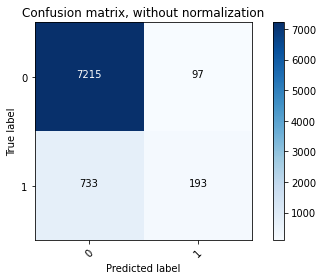

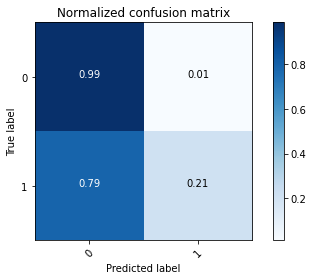

In [157]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [161]:
# Build Model
from sklearn.tree import DecisionTreeClassifier, export_graphviz
clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(x_train, y_train)


DecisionTreeClassifier()

In [166]:

score=clf.score(x_test,y_test);#testing the deciosion tree model
print("Accuracy of DecisionTreeClassifier :{}".format(clf.score(x_test,y_test)))

Accuracy of DecisionTreeClassifier :0.8486283078417092


In [168]:
# Model diagnostic
y_predicted = clf.predict(x_test)
y_predicted[0:10]


array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [179]:
# Build Model
from sklearn.ensemble import RandomForestClassifier
random= RandomForestClassifier(max_depth=2,random_state=0)


In [182]:
score=random.score(x_test,y_test)
print("Accuracy of RndomForestClassifier :{}".format(random.score(x_test,y_test)))

Accuracy of RndomForestClassifier :0.8999757222626851


In [185]:
y_predict=random.predict(x_test)
y_predict[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Naïve Bayes Classifier Algorithm

In [186]:
from sklearn.naive_bayes import GaussianNB  
nb = GaussianNB()  
nb.fit(x_train, y_train)

GaussianNB()

In [187]:
nb.score(x_test,y_test)
print('Accuracy Score with Naïve Bayes Classifier:{}'.format(nb.score(x_test,y_test)))

Accuracy Score with Naïve Bayes Classifier:0.8340616654527798


In [188]:
y_pred4 = nb.predict(x_test)
y_pred4[0:100]

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Support Vector Machine Algorithm

In [ ]:
from sklearn.svm import SVC
support = SVC(kernel='linear', random_state=0)  
support.fit(x_train, y_train) 

In [ ]:
support.score(x_test,y_test)

print('Accuracy Score with Naïve Bayes Classifier:{}'.format(support.score(x_test,y_test)))

In [ ]:
y_pred5 = support.predict(x_test)
y_pred5[0:100]